# Machine Learning Model Evaluation

In [1]:
import pandas as pd 
import numpy as np 
from sklearn import tree
from sklearn import metrics
from sklearn import datasets 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score

In [2]:
iris = load_iris()

In [3]:
X = iris.data

In [4]:
y = iris.target

In [5]:
y.shape

(150,)

In [6]:
np.unique(y)

array([0, 1, 2])

In [7]:
X.shape

(150, 4)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, test_size = 0.20)

In [9]:
#Decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = tree.predict(X_test)

### Accuracy
Accuracy is defined as the ratio of the number of correct predictions to the total number of predictions. This is the most fundamental metric used to evaluate the model. The formula is given by:

Accuracy = (TP+TN)/(TP+TN+FP+FN)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


### Precision and Recall
Precision is the ratio of true positives to the summation of true positives and false positives. It basically analyses the positive predictions.

Precision = TP/(TP+FP)

The drawback of Precision is that it does not consider the True  Negatives and False Negatives.

Recall is the ratio of true positives to the summation of true positives and false negatives. It basically analyses the number of correct positive samples.

Recall = TP/(TP+FN)

The drawback of Recall is that often it leads to a higher false positive rate.



In [13]:
print("Precision:", precision_score(y_test, y_pred, average = "weighted"))
print("Recall:", recall_score(y_test, y_pred, average = "weighted"))

Precision: 0.9435897435897436
Recall: 0.9333333333333333


### F1 score
The F1 score is the harmonic mean of precision and recall. It is seen that during the precision-recall trade-off if we increase the precision, recall decreases and vice versa. The goal of the F1 score is to combine precision and recall. 


F1 score = (2×Precision×Recall)/(Precision+Recall)


In [14]:
print("F1 Score:", f1_score(y_test, y_pred, average = "weighted"))

F1 Score: 0.9327777777777778


### Confusion Matrix
A confusion matrix is an N x N matrix where N is the number of target classes. It represents the number of actual outputs and the predicted outputs. Some terminologies in the matrix are as follows:

True Positives: It is also known as TP. It is the output in which the actual and the predicted values are YES.
True Negatives:  It is also known as TN. It is the output in which the actual and the predicted values are NO.
False Positives: It is also known as FP. It is the output in which the actual value is NO but the predicted value is YES.
False Negatives:  It is also known as FN. It is the output in which the actual value is YES but the predicted value is NO.

In [15]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

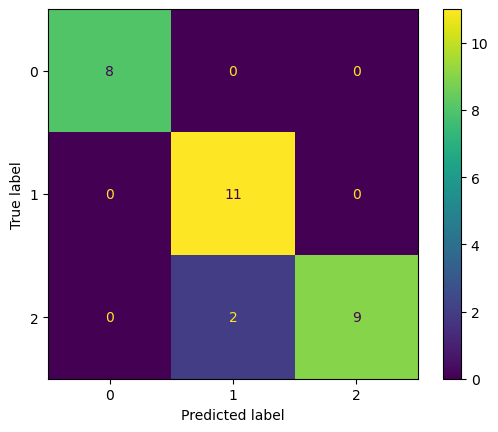

In [16]:
cm_display.plot()
plt.show()

### AUC-ROC Curve
AUC (Area Under Curve) is an evaluation metric that is used to analyze the classification model at different threshold values. The Receiver Operating Characteristic(ROC) curve is a probabilistic curve used to highlight the model’s performance. The curve has two parameters:

TPR: It stands for True positive rate. It basically follows the formula of Recall.

FPR: It stands for False Positive rate. It is defined as the ratio of False positives to the summation of false positives and True negatives.

This curve is useful as it helps us to determine the model’s capacity to distinguish between different classes. Let us illustrate this with the help of a simple Python example

In [17]:
import numpy as np
from sklearn.metrics import roc_auc_score


y_true = [1, 0, 0, 1] 
y_pred = [1, 0, 0.9, 0.2] 
auc = np.round(roc_auc_score(y_true, 
                             y_pred), 3) 
print("Auc", (auc)) 

Auc 0.75


AUC score is a useful metric to evaluate the model. It basically highlights a model’s capacity to separate the classes. In the above code, 0.75 is a good AUC score. A model is considered good if the AUC score is greater than 0.5 and approaches 1. A poor model has an AUC score of 0.

### Evaluation Task for Regression
Evaluation Metrics for Regression Task
Regression is used to determine continuous values. It is mostly used to find a relation between a dependent and an independent variable. For classification, we use a confusion matrix, accuracy, f1 score, etc. But for regression analysis, since we are predicting a numerical value it may differ from the actual output.  So we consider the error calculation as it helps to summarize how close the prediction is to the actual value. There are many metrics available for evaluating the regression model.

In this Python Code, we have implemented a simple regression model using the Mumbai weather CSV file. This file comprises Day, Hour, Temperature, Relative Humidity, Wind Speed, and Wind Direction. The link for the dataset is here.

 We are basically interested in finding a relationship between Temperature and Relative Humidity. Here Relative Humidity is the dependent variable and Temperature is the independent variable. We performed the Linear Regression and used the metrics to evaluate the performance of our model. To calculate the metrics we make extensive use of sklearn library.



In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
from sklearn.metrics import mean_absolute_percentage_error

In [20]:
df = pd.read_csv('weather.csv')

In [22]:
df.head(2)

,Day,Hour,Temperature,Relative Humidity,Wind Speed,Wind Direction
0,2,0,28.94,77,9.69,221.99
1,2,1,28.79,79,13.04,219.40


In [23]:
X = df.iloc[:,2].values

In [29]:
Y = df.iloc[:,3].values

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0) 

In [32]:
X_train = X_train.reshape(-1,1)

In [34]:
X_train.shape

(153, 1)

In [35]:
X_test = X_test.reshape(-1,1)

In [36]:
regression = LinearRegression()

In [37]:
regression.fit(X_train, Y_train)

LinearRegression()

In [38]:
Y_pred = regression.predict(X_test)

In [42]:
Y_pred.shape

(39,)

### Mean Absolute Error(MAE)
MAE = ∑|ypred-yactual| / N

In [43]:
mae = mean_absolute_error(y_true = Y_test, y_pred = Y_pred)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.7236295632503873


### Mean Squared Error(MSE)
MSE = ∑(ypred - yactual)2 / N

In [44]:
mse = mean_squared_error(y_true = Y_test, y_pred = Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.9808057060106954


### Root Mean Squared Error(RMSE)
RMSE=√(∑(ypred - yactual)2 / N)

In [47]:
rmse = mean_squared_error(y_true = Y_test, y_pred = Y_pred, squared= False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1.9951956560725306


### Mean Absolute Percentage Error
MAPE is basically used to express the error in terms of percentage. It is defined as the difference between the actual and predicted value. The error is then divided by the actual value. The results are then summed up and finally, we calculate the average. Smaller the percentage better the performance of the model. The formula is given by

MAPE = ∑((ypred-yactual) / yactual) / N * 100 %

In [48]:
mape = mean_absolute_percentage_error(y_true = Y_test, y_pred = Y_pred, sample_weight = None, 
                                      multioutput = 'uniform_average')
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 0.02334408993333347
